MNIST手書き数字データセットの特徴量選択

訓練データから 5 枚の画像を出力します


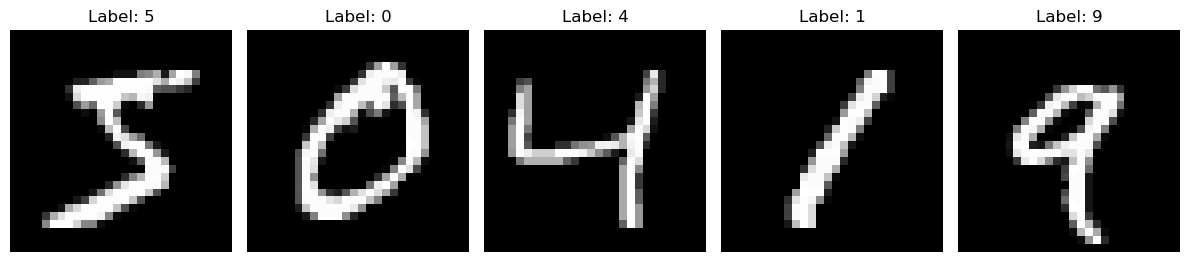

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist

(x_train, y_train), (_, _) = mnist.load_data()
num_to_show = 5 #表示する画像の枚数
plt.figure(figsize=(12, 3)) #グラフ全体のサイズ設定
print(f"訓練データから {num_to_show} 枚の画像を出力します")
for i in range(num_to_show):
    plt.subplot(1, num_to_show, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout() #レイアウトの調整
plt.show() #画像を表示

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
sum_train = np.sum(x_train, axis=0).reshape(1,784)
avrage_train = sum_train/60000
num = np.where((avrage_train>3))
avrage_train2 = avrage_train[0,num[1]]
b=len(avrage_train2)
x_train=x_train.reshape(60000,784)

#print(x_train[1,num[1]])
#print(len(x_train[1,num[1]]))

z = np.zeros((60000,b))

for i in range(60000):
    z[i] = x_train[i,num[1]]
len(z)
x_train = z
y_train=to_categorical(y_train,num_classes=10)



In [6]:
import numpy as np


x_test=x_test.reshape(10000,784)

#print(x_train[1,num[1]])
#print(len(x_train[1,num[1]]))

q= np.zeros((10000,b))

for i in range(10000):
    q[i] = x_test[i,num[1]]
len(q)
x_test = q
y_test=to_categorical(y_test,num_classes=10)

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input # Inputレイヤーをインポート

tensorflow.random.set_seed(seed=1)#乱数の固定
#モデルの定義
model=Sequential()
model.add(Input(shape=(b,))) 
model.add(Dense(units=16, activation="sigmoid"))
model.add(Dense(units=10,activation="softmax"))

model.compile(
    loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"],
)

In [8]:
import time
#学習開始
start_time=time.time()
history=model.fit(
    x_train,y_train,batch_size=1000,epochs=10,verbose=1,
    validation_data=(x_test,y_test),
)
score=model.evaluate(x_test,y_test,verbose=0)
calculation_time=time.time()-start_time
#結果表示
print(f"Test loss: {score[0]:.4f}") #モデルの予測と実際のラベルとの誤差
print(f"Test accuracy:{score[1]:.4f}") #モデルの最終的な正解率
print(f"Calculation time:{calculation_time:.2f} sec") #学習にかかった合計時間

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2828 - loss: 2.1280 - val_accuracy: 0.5002 - val_loss: 1.8132
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 1.6282 - val_accuracy: 0.7018 - val_loss: 1.4465
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 1.3455 - val_accuracy: 0.7730 - val_loss: 1.2242
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7809 - loss: 1.1565 - val_accuracy: 0.8050 - val_loss: 1.0637
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 1.0167 - val_accuracy: 0.8222 - val_loss: 0.9425
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.8932 - val_accuracy: 0.8410 - val_loss: 0.8219
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.7925 - val_accuracy: 0.8553 - val_loss: 0.7440
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.7223 - val_accuracy: 0.8625 - val_loss: